In [22]:
import pandas as pd
import numpy as np
import random
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn import tree
from sklearn import ensemble
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_recall_fscore_support,classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score,make_scorer
from sklearn.model_selection import cross_val_score,StratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.decomposition import PCA

In [23]:
data = pd.read_csv("dataset\\ai4i2020.csv")

In [24]:
data.head()

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
0,1,M14860,M,298.1,308.6,1551,42.8,0,0,0,0,0,0,0
1,2,L47181,L,298.2,308.7,1408,46.3,3,0,0,0,0,0,0
2,3,L47182,L,298.1,308.5,1498,49.4,5,0,0,0,0,0,0
3,4,L47183,L,298.2,308.6,1433,39.5,7,0,0,0,0,0,0
4,5,L47184,L,298.2,308.7,1408,40.0,9,0,0,0,0,0,0


In [25]:
data.describe()

,UDI,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000
mean,5000.50000,300.004930,310.005560,1538.776100,39.986910,107.951000,0.033900,0.004600,0.011500,0.009500,0.009800,0.00190
std,2886.89568,2.000259,1.483734,179.284096,9.968934,63.654147,0.180981,0.067671,0.106625,0.097009,0.098514,0.04355
min,1.00000,295.300000,305.700000,1168.000000,3.800000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
25%,2500.75000,298.300000,308.800000,1423.000000,33.200000,53.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
50%,5000.50000,300.100000,310.100000,1503.000000,40.100000,108.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
75%,7500.25000,301.500000,311.100000,1612.000000,46.800000,162.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
max,10000.00000,304.500000,313.800000,2886.000000,76.600000,253.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000


In [26]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   UDI                      10000 non-null  int64  
 1   Product ID               10000 non-null  object 
 2   Type                     10000 non-null  object 
 3   Air temperature [K]      10000 non-null  float64
 4   Process temperature [K]  10000 non-null  float64
 5   Rotational speed [rpm]   10000 non-null  int64  
 6   Torque [Nm]              10000 non-null  float64
 7   Tool wear [min]          10000 non-null  int64  
 8   Machine failure          10000 non-null  int64  
 9   TWF                      10000 non-null  int64  
 10  HDF                      10000 non-null  int64  
 11  PWF                      10000 non-null  int64  
 12  OSF                      10000 non-null  int64  
 13  RNF                      10000 non-null  int64  
dtypes: float64(3), int64(9)

In [27]:
MF = data['TWF'] | data['HDF'] | data['PWF'] | data['OSF'] | data['RNF']
MF.value_counts()

0    9652
1     348
dtype: int64

In [28]:
MF = data['TWF'] | data['HDF'] | data['PWF'] | data['OSF'] | data['RNF']
MF.value_counts()

0    9652
1     348
dtype: int64

In [29]:
data['Machine failure'].value_counts()

0    9661
1     339
Name: Machine failure, dtype: int64

In [30]:
points = data['Machine failure'].eq(MF)
points.value_counts()

True     9973
False      27
dtype: int64

In [31]:
data[points == False].describe()

,UDI,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
count,27.000000,27.000000,27.000000,27.000000,27.000000,27.000000,27.000000,27.0,27.0,27.0,27.0,27.000000
mean,4900.444444,300.622222,310.570370,1495.518519,42.911111,119.000000,0.333333,0.0,0.0,0.0,0.0,0.666667
std,2272.428679,1.820679,1.414979,117.519678,10.515495,65.760638,0.480384,0.0,0.0,0.0,0.0,0.480384
min,1222.000000,297.000000,307.700000,1306.000000,27.300000,2.000000,0.000000,0.0,0.0,0.0,0.0,0.000000
25%,2908.000000,299.450000,309.550000,1416.000000,33.650000,65.000000,0.000000,0.0,0.0,0.0,0.0,0.000000
50%,5496.000000,300.600000,310.700000,1447.000000,45.200000,140.000000,0.000000,0.0,0.0,0.0,0.0,1.000000
75%,6285.500000,302.400000,311.850000,1586.000000,50.050000,171.000000,1.000000,0.0,0.0,0.0,0.0,1.000000
max,9016.000000,303.600000,312.500000,1710.000000,61.200000,215.000000,1.000000,0.0,0.0,0.0,0.0,1.000000


27 datapoints have wrong values for machine failure even if one of the failure modes are true.

C:\Users\Niharika\AppData\Local\Temp\ipykernel_14012\3473074404.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlationMatrix = data.corr()


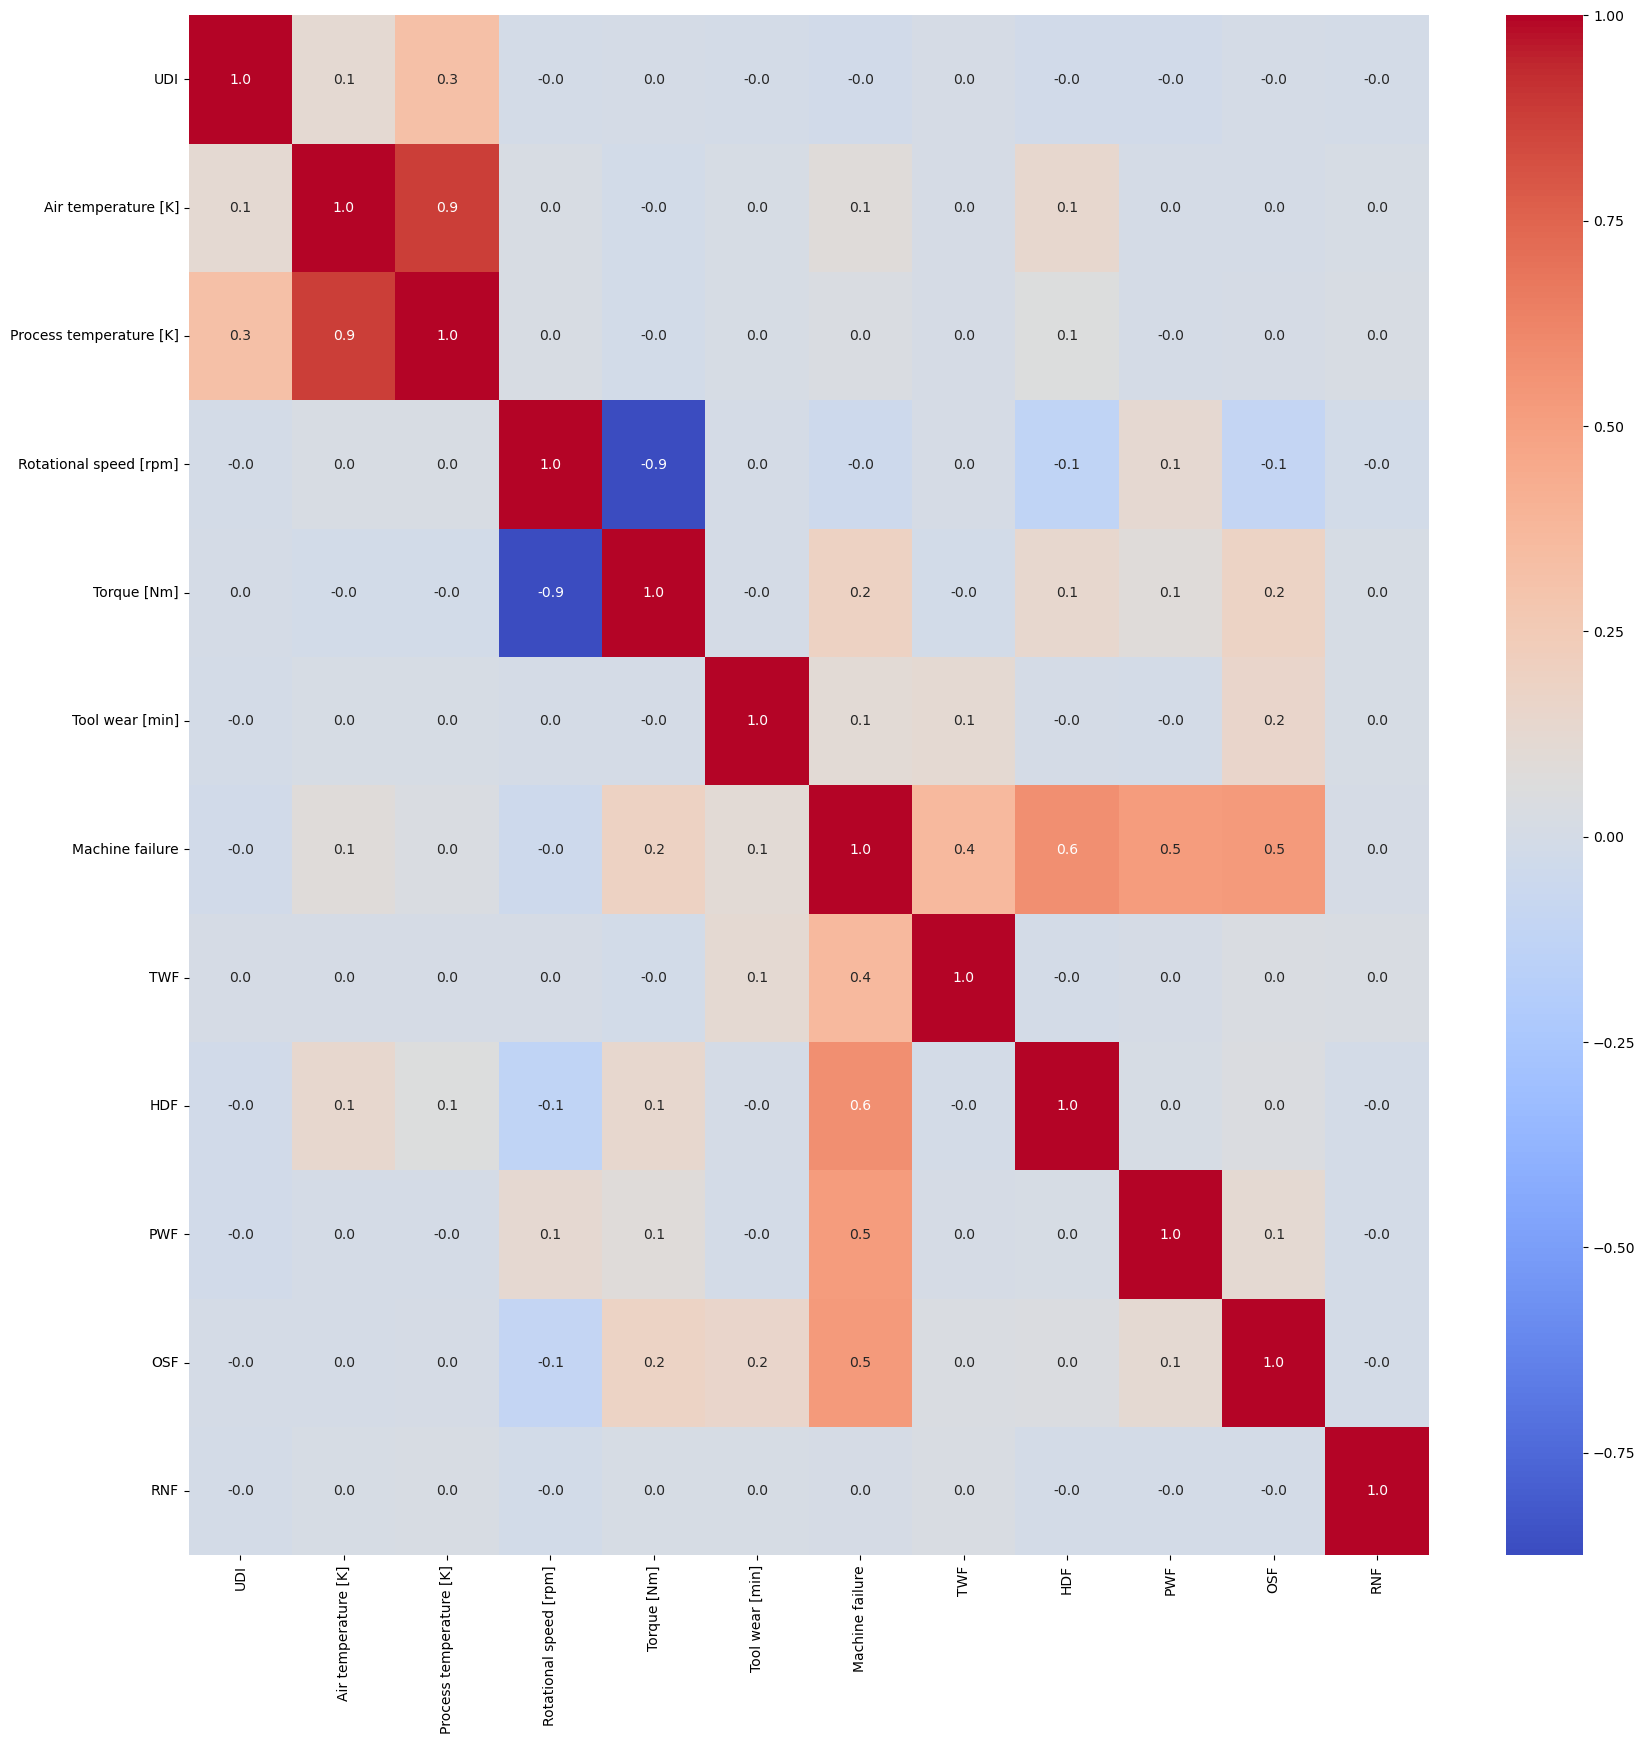

In [32]:
correlationMatrix = data.corr()
Map = sns.heatmap(correlationMatrix,annot=True,fmt='.1f',cmap='coolwarm')
Map.figure.set_size_inches(20, 20)
Map.figure.savefig('heatmap.png', dpi=500)

In [33]:
data['MF'] = data['TWF'] | data['HDF'] | data['PWF'] | data['OSF'] | data['RNF']

In [34]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   UDI                      10000 non-null  int64  
 1   Product ID               10000 non-null  object 
 2   Type                     10000 non-null  object 
 3   Air temperature [K]      10000 non-null  float64
 4   Process temperature [K]  10000 non-null  float64
 5   Rotational speed [rpm]   10000 non-null  int64  
 6   Torque [Nm]              10000 non-null  float64
 7   Tool wear [min]          10000 non-null  int64  
 8   Machine failure          10000 non-null  int64  
 9   TWF                      10000 non-null  int64  
 10  HDF                      10000 non-null  int64  
 11  PWF                      10000 non-null  int64  
 12  OSF                      10000 non-null  int64  
 13  RNF                      10000 non-null  int64  
 14  MF                     

In [35]:
target = data['MF']
target.value_counts()

0    9652
1     348
Name: MF, dtype: int64

TWF,HDF,PWF,OSF,RNF are the independentfailure modes and hence not considered as input variables. UDI represents the index. It doesn't contribute to the output in any way. Therefore, we remove the "UDI" column. We remove "Product ID" as well as it contains only product label for identification and doesn't contribute to predictions

In [36]:
data.drop(["TWF","HDF","PWF","OSF","RNF","UDI"], axis = 1,inplace=True)

In [37]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Product ID               10000 non-null  object 
 1   Type                     10000 non-null  object 
 2   Air temperature [K]      10000 non-null  float64
 3   Process temperature [K]  10000 non-null  float64
 4   Rotational speed [rpm]   10000 non-null  int64  
 5   Torque [Nm]              10000 non-null  float64
 6   Tool wear [min]          10000 non-null  int64  
 7   Machine failure          10000 non-null  int64  
 8   MF                       10000 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 703.2+ KB


In [38]:
inputFeatures = data.drop(['Machine failure','MF','Product ID'],axis=1)

#extract only numerical colums
numColumns = inputFeatures.select_dtypes(include=np.number)

In [39]:
# standardize the data to have 0 mean and unit variance
scaler= StandardScaler()
standardizedInput = scaler.fit_transform(numColumns)

In [40]:
#put the inputs into a pandas dataframe
standardizedInput = pd.DataFrame(standardizedInput, columns=numColumns.columns)
inputData = pd.concat([standardizedInput, inputFeatures.select_dtypes(include=['object'])], axis=1)

In [41]:
inputData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Air temperature [K]      10000 non-null  float64
 1   Process temperature [K]  10000 non-null  float64
 2   Rotational speed [rpm]   10000 non-null  float64
 3   Torque [Nm]              10000 non-null  float64
 4   Tool wear [min]          10000 non-null  float64
 5   Type                     10000 non-null  object 
dtypes: float64(5), object(1)
memory usage: 468.9+ KB


In [42]:
inputData.head()

,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Type
0,-0.952389,-0.947360,0.068185,0.282200,-1.695984,M
1,-0.902393,-0.879959,-0.729472,0.633308,-1.648852,L
2,-0.952389,-1.014761,-0.227450,0.944290,-1.617430,L
3,-0.902393,-0.947360,-0.590021,-0.048845,-1.586009,L
4,-0.902393,-0.879959,-0.729472,0.001313,-1.554588,L


In [43]:
#one-hot encoding for Type variable. Converting doing one hot encoding for Type variable. Converting Type column to 3 separate variables 
#called Type_L, Type_M and Type_H. There are 3 types of categorical levels in Type.
#Therefore converting the Type column to 3 separate variables

oneHotEncodingType = pd.get_dummies(data['Type'],prefix='Type')
inputData = pd.concat([inputData,oneHotEncodingType],axis=1)
inputData.drop('Type',axis=1,inplace=True)

In [44]:
inputData = inputData.astype('float64')

In [45]:
inputData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Air temperature [K]      10000 non-null  float64
 1   Process temperature [K]  10000 non-null  float64
 2   Rotational speed [rpm]   10000 non-null  float64
 3   Torque [Nm]              10000 non-null  float64
 4   Tool wear [min]          10000 non-null  float64
 5   Type_H                   10000 non-null  float64
 6   Type_L                   10000 non-null  float64
 7   Type_M                   10000 non-null  float64
dtypes: float64(8)
memory usage: 625.1 KB


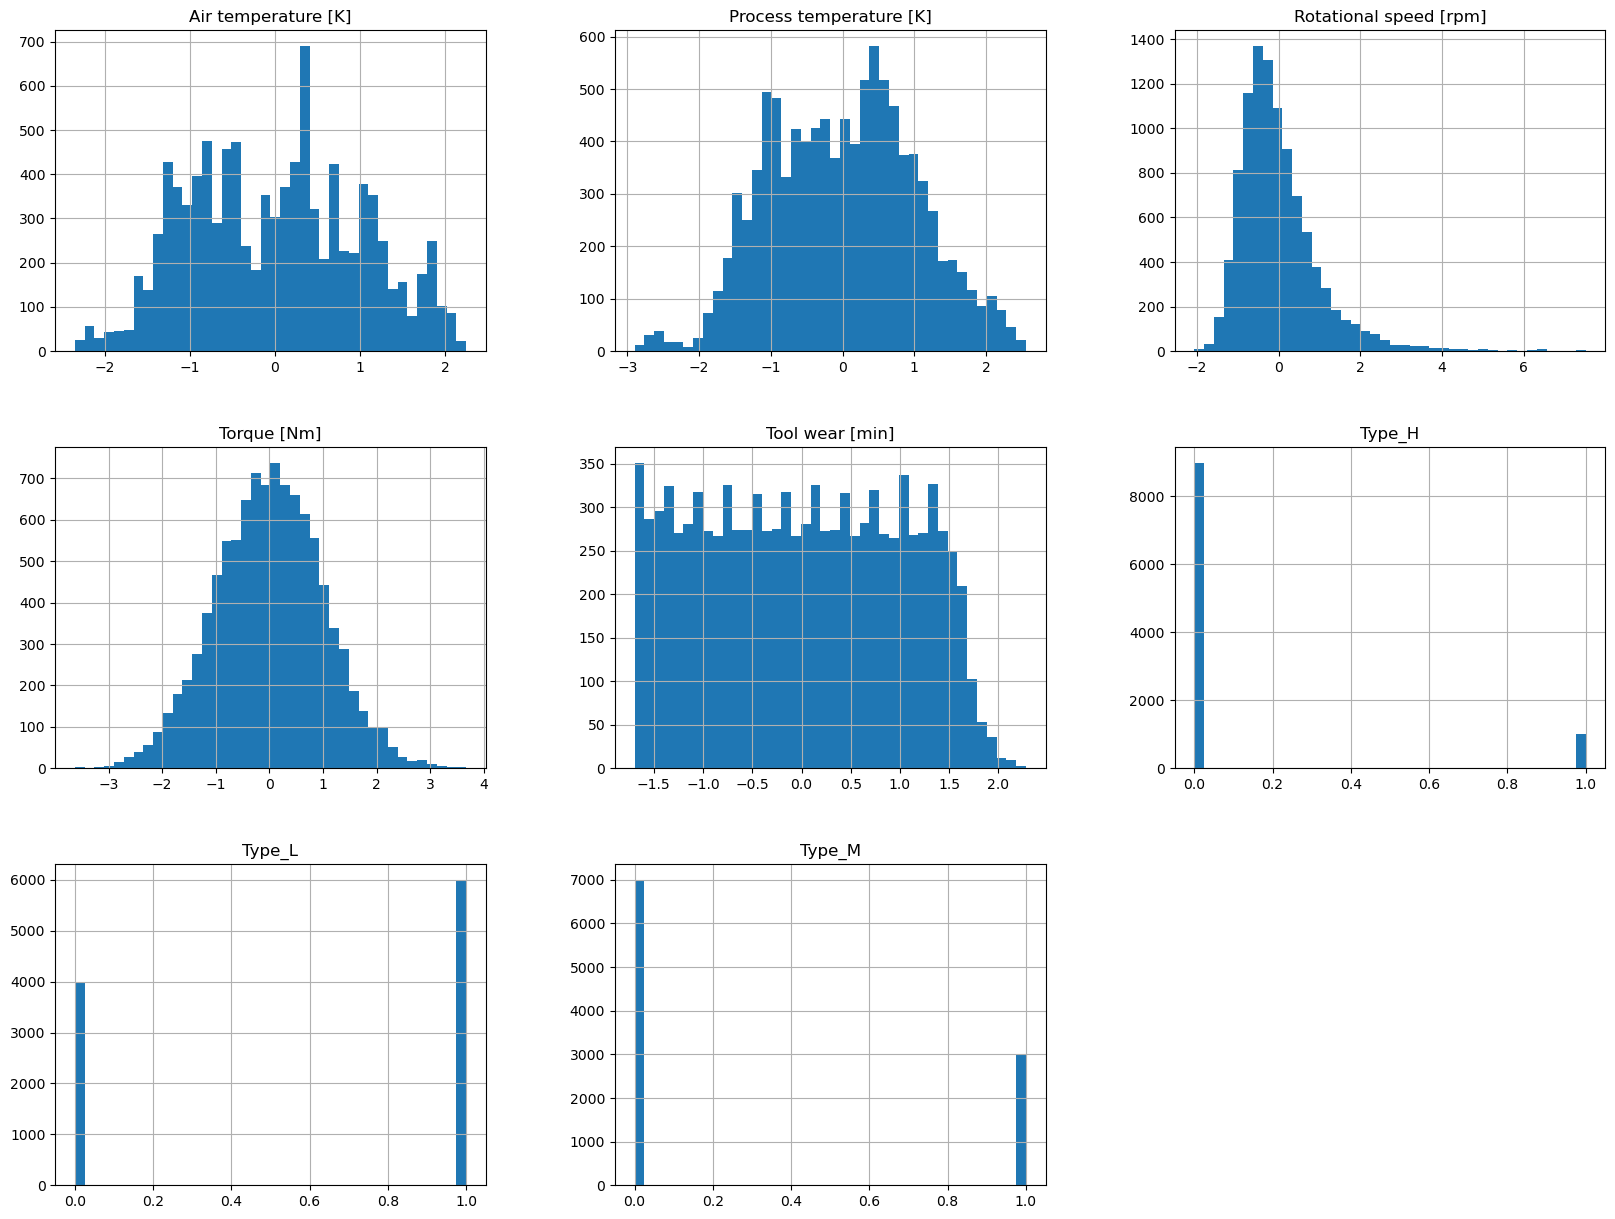

In [46]:
#DATA VISUALIZATION, plotting histogram of input variables
inputData.hist(bins=40, figsize=(20,15))
plt.savefig('histogram.png', dpi=300)
plt.show()

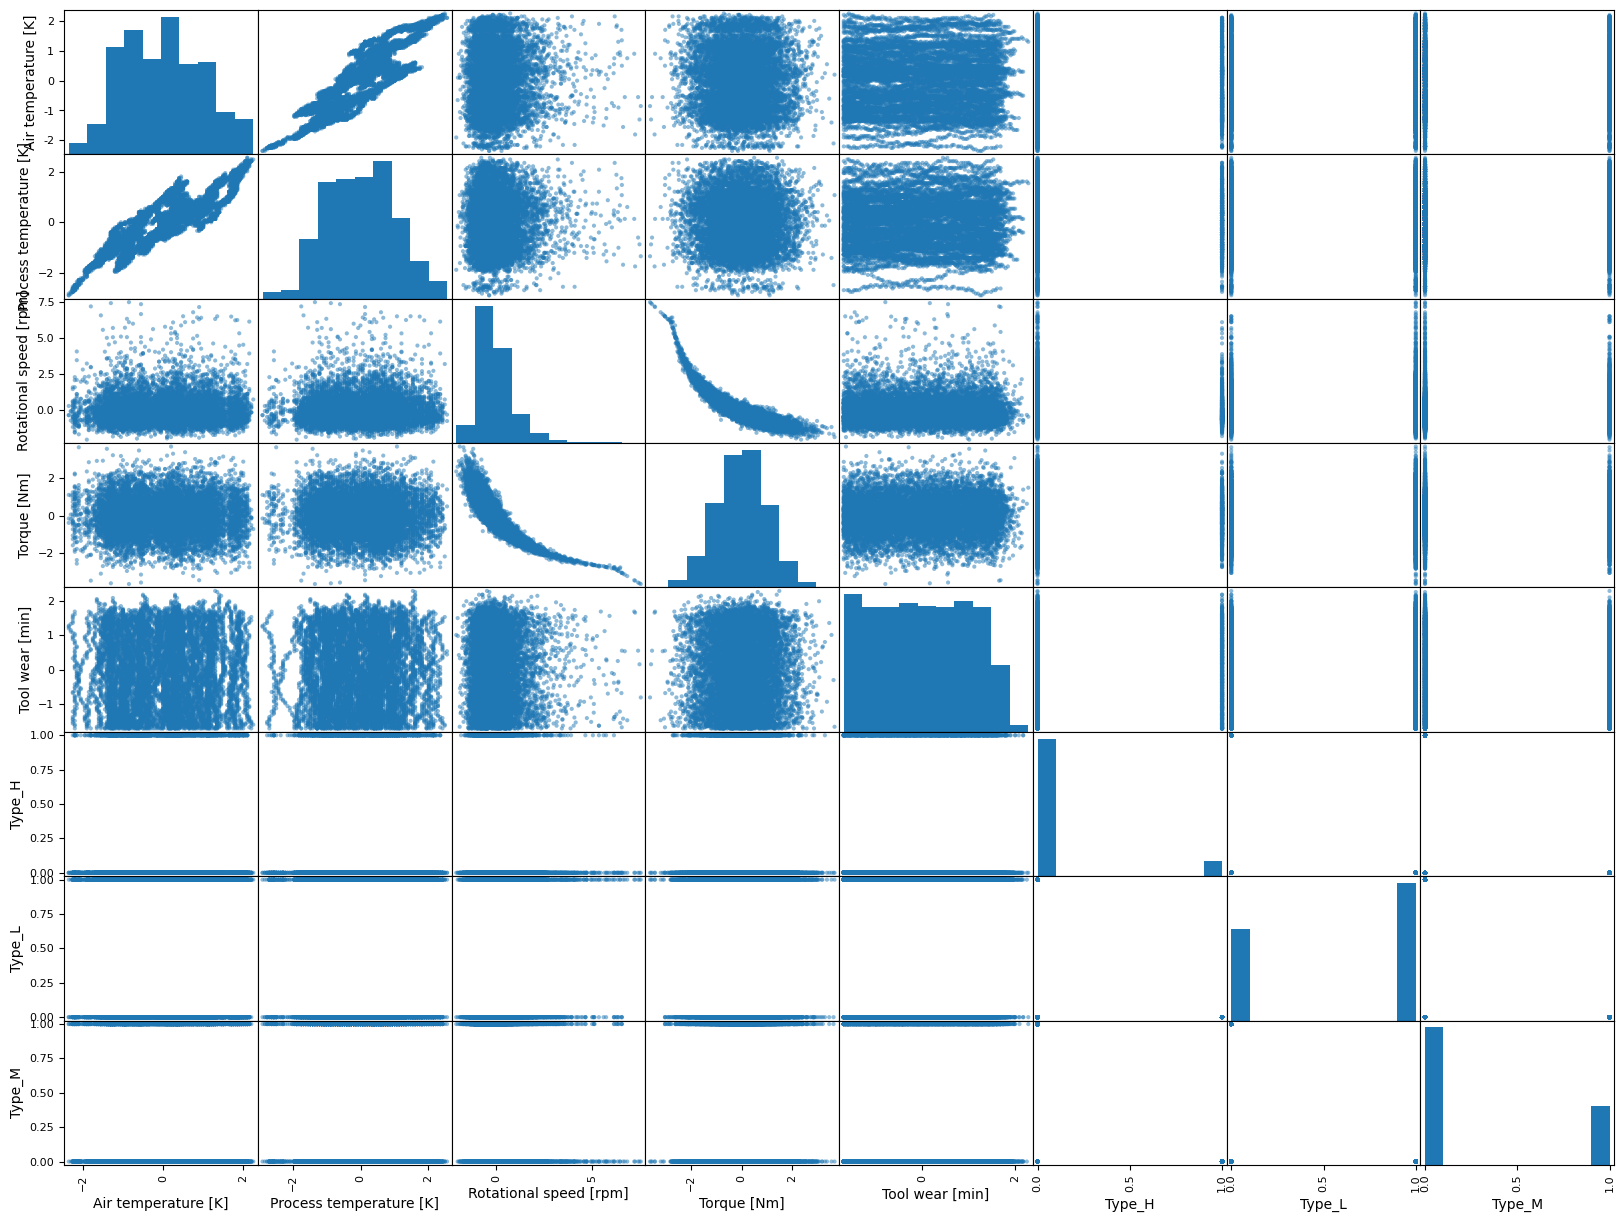

In [47]:
#plotting scatter plot of input variables
pd.plotting.scatter_matrix(inputData,figsize=(20,15))
plt.savefig('scatter.png', dpi=300)
plt.show()

<AxesSubplot: >

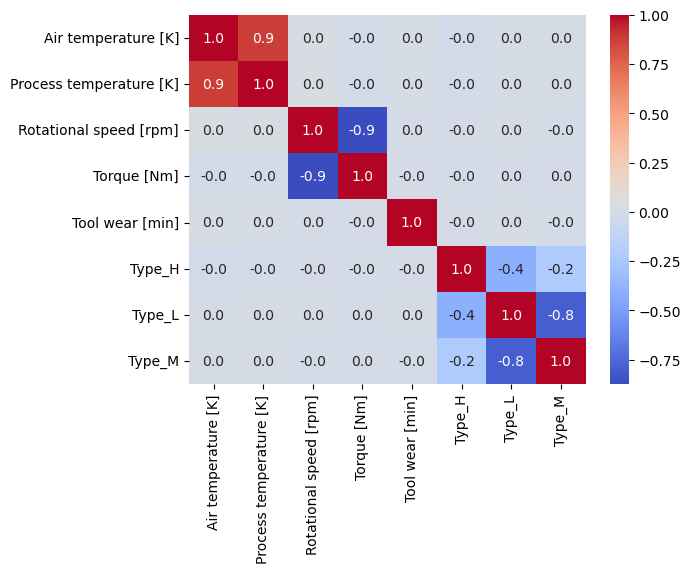

In [48]:
#plotting correlation map of input variables after data pre-processing
correlationMatrix = inputData.corr()
sns.heatmap(correlationMatrix,annot=True,fmt='.1f',cmap='coolwarm')

Data visualization:
In the histogram plot, the rotational speed variable is a little skewed towards the right
In correlation matrix,air temperature and process temperature are highly correlated with a value of 0.9. We may consider removing any one of them
Torque and rotational speed are inversely correlated with a value of -0.9

Feature selection: Backward analysis

In [49]:
inputData.head()

,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Type_H,Type_L,Type_M
0,-0.952389,-0.947360,0.068185,0.282200,-1.695984,0.0,0.0,1.0
1,-0.902393,-0.879959,-0.729472,0.633308,-1.648852,0.0,1.0,0.0
2,-0.952389,-1.014761,-0.227450,0.944290,-1.617430,0.0,1.0,0.0
3,-0.902393,-0.947360,-0.590021,-0.048845,-1.586009,0.0,1.0,0.0
4,-0.902393,-0.879959,-0.729472,0.001313,-1.554588,0.0,1.0,0.0


retained dimensions:  8 F1score:  0.9550493368014082
Index of removed dimension from the retained dimensions:  0
Column going to be removed: Air temperature [K]
retained dimensions:  7 F1score:  0.9566720904206315
Index of removed dimension from the retained dimensions:  4
Column going to be removed: Type_H
retained dimensions:  6 F1score:  0.9566720904206315
Index of removed dimension from the retained dimensions:  3
Column going to be removed: Tool wear [min]
retained dimensions:  5 F1score:  0.9558398987501976
Index of removed dimension from the retained dimensions:  2
Column going to be removed: Torque [Nm]
retained dimensions:  4 F1score:  0.948108121310808
Index of removed dimension from the retained dimensions:  0
Column going to be removed: Process temperature [K]
retained dimensions:  3 F1score:  0.948108121310808
Index of removed dimension from the retained dimensions:  0
Column going to be removed: Rotational speed [rpm]
retained dimensions:  2 F1score:  0.948108121310808
In

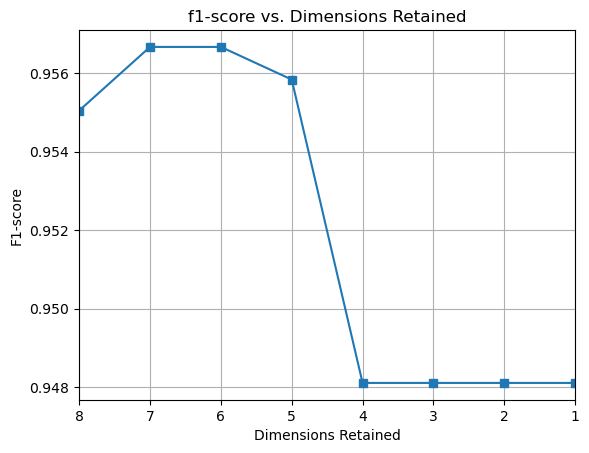

In [50]:
#backward selection using logistic regression classifier
random.seed(42)
logisticRegression = LogisticRegression(max_iter=1000,random_state=42)
attributes = inputData.shape[1]
#print(attributes)
#split the data into train and test
X_train, X_test, y_train, y_test = train_test_split(inputData,target,test_size=0.25,stratify=target,random_state=42)

train_data_reduced = X_train
test_data_reduced = X_test
retainedDimensionsPlotLR = []

F1scorePlotLR = []
PvaluePlot = []

for iteration in range(attributes):
    F1scoreLR = []
    Pvalue = []
    # Calculating error when all dimensions are retained
    if iteration == 0 or iteration == 7:
        #Train the Logistic Regression Model
        yPredLR = [None]*len(y_test)
        
        logisticRegression.fit(train_data_reduced,y_train)
        
        #predict the output for the test set
        yPredLR = logisticRegression.predict(test_data_reduced)
        
        #calculate f1-score
        F1ScoreBackwardSearchLR = f1_score(y_test,yPredLR,average = 'weighted')
        F1scoreLR.append(F1ScoreBackwardSearchLR)
        
    else:
        for dimension in range(attributes - iteration-1,-1,-1):
            #Reduce the dimensions of input data
            X_trainDimensionReduced = train_data_reduced.drop(train_data_reduced.columns[dimension], axis=1)
            X_testDimensionReduced = test_data_reduced.drop(test_data_reduced.columns[dimension], axis=1)

            #Train the Logistic Regression Model
            yPredLR = [None]*len(y_test)
            #logisticRegression = LogisticRegression(max_iter=1000)
            logisticRegression.fit(X_trainDimensionReduced,y_train)
            
            #predict the output for the test set
            yPredLR = logisticRegression.predict(X_testDimensionReduced)
            
            #calculate f1-score
            F1ScoreBackwardSearchLR = f1_score(y_test,yPredLR,average = 'weighted')
            F1scoreLR.append(F1ScoreBackwardSearchLR)
            #print("F1scorePlotLR length = ", len(F1scorePlotLR))
        
    #find the maximum f1-score
    print("retained dimensions: " ,(attributes - iteration),"F1score: ",max(F1scoreLR))
    
    retainedDimensionsPlotLR.append((attributes - iteration))
    F1scorePlotLR.append(max(F1scoreLR))

    #find the index of selected dimensions
    # Find the index of the dimension of the maximum F1-score
            
    dimension_to_remove = F1scoreLR.index(min(F1scoreLR))
    print("Index of removed dimension from the retained dimensions: ",dimension_to_remove)    
    print("Column going to be removed:", train_data_reduced.columns[dimension_to_remove])

    # Remove the dimension from the data
    train_data_reduced = train_data_reduced.drop(train_data_reduced.columns[dimension_to_remove], axis=1)
    test_data_reduced = test_data_reduced.drop(test_data_reduced.columns[dimension_to_remove], axis=1)


plt.plot(retainedDimensionsPlotLR,F1scorePlotLR, marker = 's')
plt.xlabel('Dimensions Retained')
plt.ylabel('F1-score')
plt.title('f1-score vs. Dimensions Retained')
plt.xlim(max(retainedDimensionsPlotLR), min(retainedDimensionsPlotLR))
plt.grid(True)
plt.show()

We get the best F1-score when we retain 6 features. Therefore, eliminate 2 features for Logistic Regression. 

retained dimensions:  8 F1 Score:  0.948108121310808
Index of removed dimension from the retained dimensions:  0
Column going to be removed: Air temperature [K]
retained dimensions:  7 F1 Score:  0.970101994250059
Index of removed dimension from the retained dimensions:  4
Column going to be removed: Type_H
retained dimensions:  6 F1 Score:  0.970101994250059
Index of removed dimension from the retained dimensions:  3
Column going to be removed: Tool wear [min]
retained dimensions:  5 F1 Score:  0.9623171173351078
Index of removed dimension from the retained dimensions:  2
Column going to be removed: Torque [Nm]
retained dimensions:  4 F1 Score:  0.9519423577856864
Index of removed dimension from the retained dimensions:  2
Column going to be removed: Type_L
retained dimensions:  3 F1 Score:  0.9506810324950661
Index of removed dimension from the retained dimensions:  1
Column going to be removed: Rotational speed [rpm]
retained dimensions:  2 F1 Score:  0.948108121310808
Index of remo

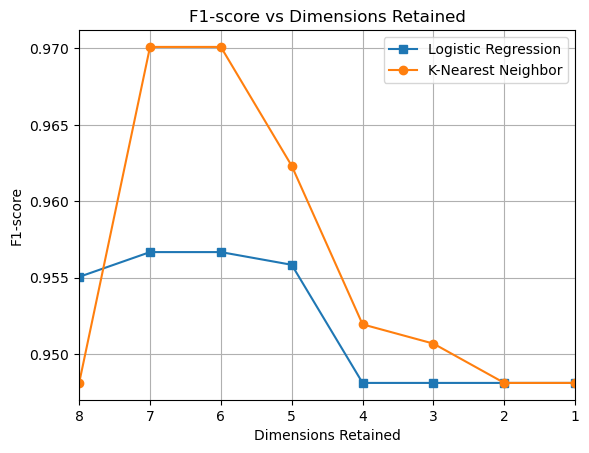

In [51]:
#backward selection using kNN classifier
#pca = PCA(n_components=attributes)  # attributes is the number of dimensions
#train_data_reduced = pca.fit_transform(train_data_reduced)
#test_data_reduced = pca.transform(test_data_reduced)

knnclassifier = KNeighborsClassifier(n_neighbors=3)
attributes = inputData.shape[1]
#print(attributes)
#split the data into train and test
X_train, X_test, y_train, y_test = train_test_split(inputData,target, test_size=0.25,stratify=target,random_state=42)
            

train_data_reduced = X_train
test_data_reduced = X_test
retainedDimensionsPlotKNN = []
F1scorePlotKNN = []

for iteration in range(attributes):    
    F1ScoreKNN = []
    # Calculating error when all dimensions are retained
    if iteration == 0 or iteration == 7:
        #Train the Logistic Regression Model
        yPredKNN = [None]*len(y_test)
        #knnclassifier = KNeighborsClassifier(n_neighbors=3)
        knnclassifier.fit(X_trainDimensionReduced,y_train)
        yPredKNN = knnclassifier.predict(X_testDimensionReduced)
        
        #calculate f1-score
        F1scoreBackwardSearchKNN = f1_score(y_test,yPredKNN,average = 'weighted')
        F1ScoreKNN.append(F1scoreBackwardSearchKNN)
        
    else:
        for dimension in range(attributes - iteration-1,-1,-1):
            #Reduce the dimensions of input data
            X_trainDimensionReduced = train_data_reduced.drop(train_data_reduced.columns[dimension], axis=1)
            
            #X_testDimensionReduced = np.delete(test_data_reduced,dimension, axis=1)
            X_testDimensionReduced = test_data_reduced.drop(test_data_reduced.columns[dimension], axis=1)
            
            #Train the KNN classifier Model   
            yPredKNN = [None]*len(y_test)
            
            #knnclassifier = KNeighborsClassifier(n_neighbors=3)
            knnclassifier.fit(X_trainDimensionReduced,y_train)
            yPredKNN = knnclassifier.predict(X_testDimensionReduced)
            
            #calculate f1-score
            F1scoreBackwardSearchKNN = f1_score(y_test,yPredKNN,average = "weighted")
            F1ScoreKNN.append(F1scoreBackwardSearchKNN)
        
    #find the maximum f1-score
    print("retained dimensions: " ,(attributes - iteration),"F1 Score: ",max(F1ScoreKNN))
    
    retainedDimensionsPlotKNN.append((attributes - iteration))
    F1scorePlotKNN.append(max(F1ScoreKNN))
    
    
    # Find the index of the dimension of the least error
    dimension_to_remove = F1ScoreKNN.index(min(F1ScoreKNN))
    print("Index of removed dimension from the retained dimensions: ",dimension_to_remove)    
    print("Column going to be removed:", train_data_reduced.columns[dimension_to_remove])
    
    # Remove the dimension from the data
    train_data_reduced = train_data_reduced.drop(train_data_reduced.columns[dimension_to_remove], axis=1)
    test_data_reduced = test_data_reduced.drop(test_data_reduced.columns[dimension_to_remove], axis=1)
   

plt.plot(retainedDimensionsPlotLR,F1scorePlotLR, marker='s', label='Logistic Regression')
plt.plot(retainedDimensionsPlotKNN,F1scorePlotKNN, marker = 'o', label = 'K-Nearest Neighbor')
plt.xlabel('Dimensions Retained')
plt.ylabel('F1-score')
plt.title('F1-score vs Dimensions Retained')
plt.xlim(max(retainedDimensionsPlotLR), min(retainedDimensionsPlotLR))
plt.grid(True)
plt.legend()
plt.show()


Highest F1-score for Knn is when we retain 7 or 6 dimensions. Therefore, to make the model simple, we retain 6 features.

retained dimensions:  8 F1 Score:  0.948108121310808
Index of removed dimension from the retained dimensions:  0
Column going to be removed: Air temperature [K]
F1ScoreRF= [0.948108121310808]
retained dimensions:  7 F1 Score:  0.96910625
Index of removed dimension from the retained dimensions:  4
Column going to be removed: Type_H
F1ScoreRF= [0.9677840295663568, 0.9618772024344009, 0.9671482561382989, 0.9583344162495974, 0.9545266693570232, 0.9683701876481527, 0.96910625]
retained dimensions:  6 F1 Score:  0.9699874461538462
Index of removed dimension from the retained dimensions:  3
Column going to be removed: Tool wear [min]
F1ScoreRF= [0.9658549180327869, 0.9628674049685721, 0.9597754271064481, 0.9559359872293725, 0.969847632396263, 0.9699874461538462]
retained dimensions:  5 F1 Score:  0.9616509723744366
Index of removed dimension from the retained dimensions:  2
Column going to be removed: Torque [Nm]
F1ScoreRF= [0.9577641984617705, 0.9616509723744366, 0.948530749484797, 0.9545872

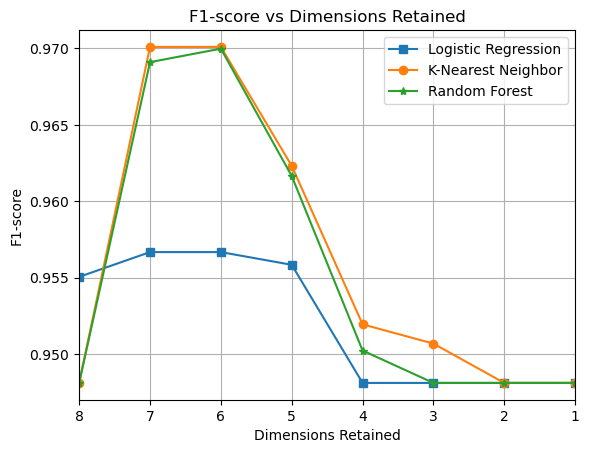

In [33]:
#backward selection using Random Forest classifier

randomForest = ensemble.RandomForestClassifier(n_estimators=4,random_state=42)

attributes = inputData.shape[1]

#split the data into train and test
X_train, X_test, y_train, y_test = train_test_split(inputData,target, test_size=0.25,stratify=target,random_state=42)
            

train_data_reduced = X_train
test_data_reduced = X_test
retainedDimensionsPlotRF = []
F1scorePlotRF = []

for iteration in range(attributes):    
    F1ScoreRF = []
    # Calculating error when all dimensions are retained
    if iteration == 0 or iteration == 7:
        #Train the Random Forest Model
        yPredRF = [None]*len(y_test)
        #randomForest = ensemble.RandomForestClassifier(n_estimators=4,random_state=42)
        randomForest.fit(X_trainDimensionReduced,y_train)
        yPredRF = randomForest.predict(X_testDimensionReduced)
        
        #calculate f1-score
        F1scoreBackwardSearchRF = f1_score(y_test,yPredRF,average = 'weighted')
        F1ScoreRF.append(F1scoreBackwardSearchRF)
        
    else:
        for dimension in range(attributes - iteration-1,-1,-1):
            #Reduce the dimensions of input data
            X_trainDimensionReduced = train_data_reduced.drop(train_data_reduced.columns[dimension], axis=1)
            #print("X_trainDimensionReduced = ", X_trainDimensionReduced.shape)
            #X_testDimensionReduced = np.delete(test_data_reduced,dimension, axis=1)
            X_testDimensionReduced = test_data_reduced.drop(test_data_reduced.columns[dimension], axis=1)
            #print("X_testDimensionReduced = ",X_testDimensionReduced.shape)

            #Train the Random forest classifier Model   
            yPredRF = [None]*len(y_test)
            #randomForest = ensemble.RandomForestClassifier(n_estimators=4)
            randomForest.fit(X_trainDimensionReduced,y_train)
            yPredRF = randomForest.predict(X_testDimensionReduced)
            
            #calculate f1-score
            F1scoreBackwardSearchRF = f1_score(y_test,yPredRF,average = "weighted")
            F1ScoreRF.append(F1scoreBackwardSearchRF)
            
    #find the maximum F1-score error
    print("retained dimensions: " ,(attributes - iteration),"F1 Score: ",max(F1ScoreRF))
    
    retainedDimensionsPlotRF.append((attributes - iteration))
    F1scorePlotRF.append(max(F1ScoreRF))
    
    # Find the index of the dimension of the least f1 score error
    dimension_to_remove = F1ScoreRF.index(min(F1ScoreRF))
    print("Index of removed dimension from the retained dimensions: ",dimension_to_remove)    
    print("Column going to be removed:", train_data_reduced.columns[dimension_to_remove])
    
    # Remove the dimension from the data
    train_data_reduced = train_data_reduced.drop(train_data_reduced.columns[dimension_to_remove], axis=1)
    test_data_reduced = test_data_reduced.drop(test_data_reduced.columns[dimension_to_remove], axis=1)

    print('F1ScoreRF=',F1ScoreRF)


plt.plot(retainedDimensionsPlotLR,F1scorePlotLR, marker='s', label='Logistic Regression')
plt.plot(retainedDimensionsPlotKNN,F1scorePlotKNN, marker = 'o', label = 'K-Nearest Neighbor')
plt.plot(retainedDimensionsPlotRF,F1scorePlotRF, marker = '*', label = 'Random Forest')
plt.xlabel('Dimensions Retained')
plt.ylabel('F1-score')
plt.title('F1-score vs Dimensions Retained')
plt.xlim(max(retainedDimensionsPlotLR), min(retainedDimensionsPlotLR))
plt.grid(True)
plt.legend()
plt.show()


In [35]:
#backward selection using DT classifier

decisionTree = tree.DecisionTreeClassifier(max_depth = 5,random_state=42)

attributes = inputData.shape[1]

#split the data into train and test
X_train, X_test, y_train, y_test = train_test_split(inputData,target, test_size=0.25,stratify=target,random_state=42)
            

train_data_reduced = X_train
test_data_reduced = X_test
retainedDimensionsPlotDT = []
F1scorePlotDT = []

for iteration in range(attributes):    
    F1ScoreDT = []
    # Calculating error when all dimensions are retained
    if iteration == 0 or iteration == 7:
            
        #fitting the data to the decison tree classifier
        yPredDT = [None]*len(X_test)
        #decisionTree = tree.DecisionTreeClassifier(max_depth = 5)
        decisionTree.fit(X_trainDimensionReduced,y_train)
        yPredDT = decisionTree.predict(X_testDimensionReduced)
        #calculate f1-score
        F1scoreBackwardSearchDT = f1_score(y_test,yPredDT,average = 'weighted')
        F1ScoreDT.append(F1scoreBackwardSearchDT)
                
    else:
        for dimension in range(attributes - iteration-1,-1,-1):
            #Reduce the dimensions of input data
            X_trainDimensionReduced = train_data_reduced.drop(train_data_reduced.columns[dimension], axis=1)
            #print("X_trainDimensionReduced = ", X_trainDimensionReduced.shape)
            #X_testDimensionReduced = np.delete(test_data_reduced,dimension, axis=1)
            X_testDimensionReduced = test_data_reduced.drop(test_data_reduced.columns[dimension], axis=1)
            #print("X_testDimensionReduced = ",X_testDimensionReduced.shape)

                       
            yPredDT = [None]*len(X_test)
            #decisionTree = tree.DecisionTreeClassifier(max_depth = 5)
            decisionTree.fit(X_trainDimensionReduced,y_train)
            yPredDT = decisionTree.predict(X_testDimensionReduced)
            
            
            #calculate f1-score
            F1scoreBackwardSearchDT = f1_score(y_test,yPredDT,average = "weighted")
            F1ScoreDT.append(F1scoreBackwardSearchDT)
                    
    #find the max f1-score
    print("retained dimensions: " ,(attributes - iteration),"F1 Score: ",max(F1ScoreDT))
    
    retainedDimensionsPlotDT.append((attributes - iteration))
    F1scorePlotDT.append(max(F1ScoreDT))
    
    
    # Find the index of the dimension of the Highest F1-score
    dimension_to_remove = F1ScoreDT.index(min(F1ScoreDT))
    print("Index of removed dimension from the retained dimensions: ",dimension_to_remove)    
    print("Column going to be removed:", train_data_reduced.columns[dimension_to_remove])
    
    # Remove the dimension from the data
    train_data_reduced = train_data_reduced.drop(train_data_reduced.columns[dimension_to_remove], axis=1)
    test_data_reduced = test_data_reduced.drop(test_data_reduced.columns[dimension_to_remove], axis=1)


retained dimensions:  8 F1 Score:  0.948108121310808
Index of removed dimension from the retained dimensions:  0
Column going to be removed: Air temperature [K]
retained dimensions:  7 F1 Score:  0.9670643369251487
Index of removed dimension from the retained dimensions:  4
Column going to be removed: Type_H
retained dimensions:  6 F1 Score:  0.967388027167904
Index of removed dimension from the retained dimensions:  3
Column going to be removed: Tool wear [min]
retained dimensions:  5 F1 Score:  0.9618578621757957
Index of removed dimension from the retained dimensions:  2
Column going to be removed: Torque [Nm]
retained dimensions:  4 F1 Score:  0.9552544861337683
Index of removed dimension from the retained dimensions:  2
Column going to be removed: Type_L
retained dimensions:  3 F1 Score:  0.9558398987501976
Index of removed dimension from the retained dimensions:  1
Column going to be removed: Rotational speed [rpm]
retained dimensions:  2 F1 Score:  0.948108121310808
Index of rem

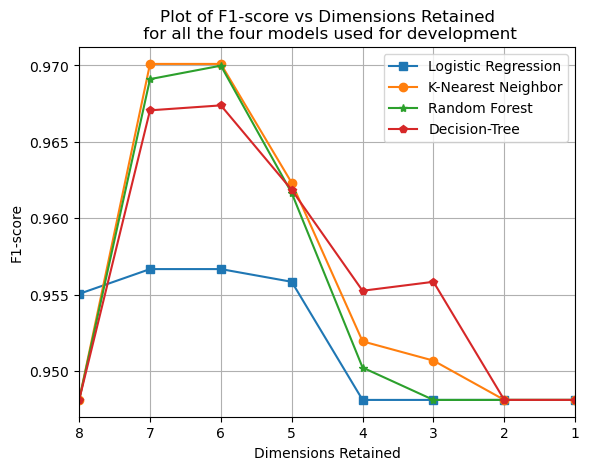

In [36]:
plt.plot(retainedDimensionsPlotLR,F1scorePlotLR, marker='s', label='Logistic Regression')
plt.plot(retainedDimensionsPlotKNN,F1scorePlotKNN, marker = 'o', label = 'K-Nearest Neighbor')
plt.plot(retainedDimensionsPlotRF,F1scorePlotRF, marker = '*', label = 'Random Forest')
plt.plot(retainedDimensionsPlotDT,F1scorePlotDT,marker = 'p',label = 'Decision-Tree')
plt.xlabel('Dimensions Retained')
plt.ylabel('F1-score')
plt.title('Plot of F1-score vs Dimensions Retained\n for all the four models used for development')
plt.xlim(max(retainedDimensionsPlotLR), min(retainedDimensionsPlotLR))
plt.grid(True)
plt.legend()
plt.savefig('F1SCorePlot.jpg')
plt.show()

All the four models have the highest F1-score when 6 dimensions are retained. Observation is that the same input features,Air temperature and Type_H are eliminated in all the four models. Therefore, we eliminate Air temperature,Type_H and perform cross-validation on the four models.

In [37]:
inputDataReduced = inputData.drop(["Air temperature [K]", "Type_H"], axis=1)

In [38]:
#split the dataset into test and train. use stratify to make sure 
# that the test and train dataset get proportionate number of each type of output
#train_set, test_set = split_train_test(inputFeatures, 0.25)
X_train, X_test, y_train, y_test = train_test_split(inputDataReduced,target, test_size=0.25,stratify=target,random_state=42)

In [39]:
type(y_train)

pandas.core.series.Series

In [40]:
print("X_train size = ", X_train.shape)
print("X_test size = ", X_test.shape)
print("y_train size = ", y_train.shape)
print("y_train size = ", y_test.shape)

X_train size =  (7500, 6)
X_test size =  (2500, 6)
y_train size =  (7500,)
y_train size =  (2500,)


In [41]:
type(X_train)

pandas.core.frame.DataFrame

In [42]:
type(y_train)

pandas.core.series.Series

In [39]:
#Nested cross-validation for Logistic Regression

# Define the parameter grid for grid search
paramGrid = {'C': [0.001, 0.01, 0.1, 1.0, 10.0, 100.0], 'penalty': ['l1','l2'],'solver': ['liblinear']}

# Initialize a logistic regression model
logisticRegression = LogisticRegression(max_iter=1000,random_state=42)

# Initialize lists to store F1-scores
outerScores = []

# Perform outer cross-validation
outerCv = 5  # number of outer folds
for train_index, val_index in StratifiedKFold(n_splits=outerCv, shuffle=True, random_state=42).split(X_train, y_train):
    # Split the data into outer training and validation sets    
    XOuterTrain, XOuterVal = X_train.iloc[train_index], X_train.iloc[val_index]
    yOuterTrain, yOuterVal = y_train.iloc[train_index], y_train.iloc[val_index]

    # Perform inner cross-validation for hyperparameter tuning
    innerCv = 3  # number of inner folds
    innerModelLR = GridSearchCV(estimator=logisticRegression, param_grid=paramGrid, cv=innerCv, scoring=make_scorer(f1_score, average='weighted'))
    innerModelLR.fit(XOuterTrain, yOuterTrain)

    # Select the best hyperparameters
    bestParamsLR = innerModelLR.best_params_

    # Train the logistic regression model with the best hyperparameters on the entire outer training set
    logisticRegression.set_params(**bestParamsLR)
    logisticRegression.fit(XOuterTrain, yOuterTrain)

    # Evaluate the model on the outer validation set
    yPredLR = logisticRegression.predict(XOuterVal)
    f1ScoreLR = f1_score(yOuterVal, yPredLR, average='weighted')
    outerScores.append(f1ScoreLR)

# Calculate the average F1-score across all outer folds
avgF1Score = np.mean(outerScores)

# Train the logistic regression model on the entire training set with the selected hyperparameters
logisticRegression.set_params(**bestParamsLR)
logisticRegression.fit(X_train, y_train)

LogisticRegression(C=10.0, max_iter=1000, penalty='l1', random_state=42,
                   solver='liblinear')

In [40]:
# Evaluate the model on the test set
yPredTestLR = logisticRegression.predict(X_test)
testF1Score = f1_score(y_test, yPredTestLR, average='weighted')

# Print the average F1-score and test F1-score
print("Average F1-score: {:.4f}".format(avgF1Score))
print("Test F1-score: {:.4f}".format(testF1Score))
print("Best parameters: ",bestParamsLR)

Average F1-score: 0.9622
Test F1-score: 0.9572
Best parameters:  {'C': 10.0, 'penalty': 'l1', 'solver': 'liblinear'}


In [48]:
print(classification_report(y_test, yPredTestLR))

              precision    recall  f1-score   support

           0       0.97      1.00      0.98      2413
           1       0.79      0.13      0.22        87

    accuracy                           0.97      2500
   macro avg       0.88      0.56      0.60      2500
weighted avg       0.96      0.97      0.96      2500



model performing better on test set

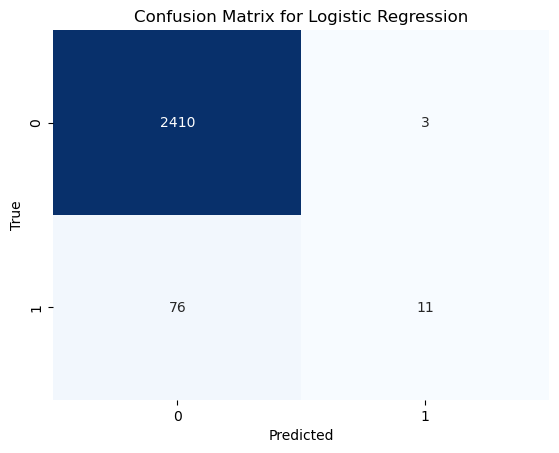

In [41]:
#plotting confusion matrix

cm = confusion_matrix(y_test, yPredTestLR)

# Create a heatmap using seaborn
sns.heatmap(cm, annot=True, cmap='Blues', fmt='d', cbar=False)

# Add labels, title, and axis ticks
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix for Logistic Regression')
plt.show()

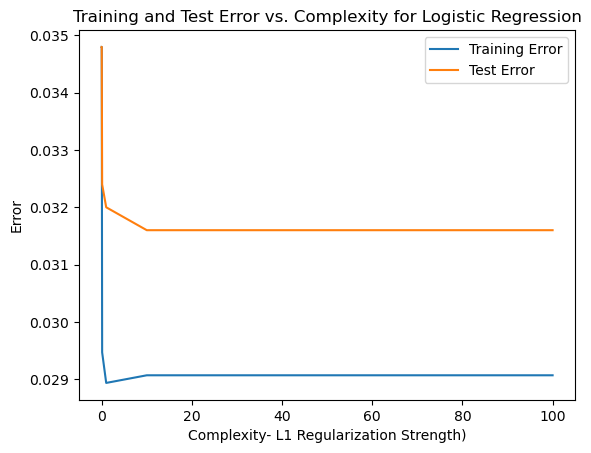

In [42]:
#plotting train error vs test error for Logistic Regression(L1 regularization)
ComplexityLevelLR = np.logspace(-3, 2, num=6)
LRtrainErrors = []
LRtestErrors = []

for level in ComplexityLevelLR:
    
    ComplexLRmodel= LogisticRegression(max_iter=1000,random_state=42,C = level,penalty='l1', solver='liblinear')
    ComplexLRmodel.fit(X_train,y_train)
    
    LRTrainPredict = ComplexLRmodel.predict(X_train)
    TrainErrorLR = 1 - accuracy_score(y_train,LRTrainPredict)
    LRtrainErrors.append(TrainErrorLR)
    
    LRTestPredict = ComplexLRmodel.predict(X_test)
    TestErrorLR = 1 - accuracy_score(y_test,LRTestPredict)
    LRtestErrors.append(TestErrorLR)
    
plt.plot(ComplexityLevelLR, LRtrainErrors, label='Training Error')
plt.plot(ComplexityLevelLR, LRtestErrors, label='Test Error')
plt.xlabel('Complexity- L1 Regularization Strength)')
plt.ylabel('Error')
plt.title('Training and Test Error vs. Complexity for Logistic Regression')
plt.legend()
plt.show()

In [43]:
#Performing cross validation using Random Forest classifier
randomForest = ensemble.RandomForestClassifier(n_estimators=4,random_state=42)

#7500 training set divided into 5 folds and one of the folds held out as test set. therefore, 
#validation set will have a shape of (1500,8)
yPredRF = [None]*(1500)

# Perform stratified k-fold cross-validation
cv_scores = []

kFoldStratified = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
for train_index, val_index in kFoldStratified.split(X_train, y_train):
    XtrainFold, XvalFold = X_train.iloc[train_index], X_train.iloc[val_index]
    ytrainFold, yvalFold = y_train.iloc[train_index], y_train.iloc[val_index]
    
    randomForest.fit(XtrainFold,ytrainFold)
    yPredRF = randomForest.predict(XvalFold)
    
    precision, recall, Scores, support = precision_recall_fscore_support(yvalFold,yPredRF, average = 'weighted')
    cv_scores.append(Scores)
print("XtrainFold", XtrainFold.shape)
print("Cross-Validation Scores(f1):", cv_scores)
print("Mean cross validation Score:", np.mean(cv_scores))

XtrainFold (6000, 6)
Cross-Validation Scores(f1): [0.9675177207977207, 0.9584840233261286, 0.9648328500649969, 0.9706867236467236, 0.9607553276353276]
Mean cross validation Score: 0.9644553290941793


In [44]:
#fine tune Random Forest model using gridsearch
# Define the parameter grid for grid search
param_grid = {
    'n_estimators': [10, 50, 100],  # Number of trees in the forest
    'max_depth': [1,5, 10],     # Maximum depth of each tree
    'min_samples_split': [2, 5, 10],# Minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2, 4],  # Minimum number of samples required to be at a leaf node
}

# Create the Random Forest classifier
randomForest = ensemble.RandomForestClassifier(random_state=42)

# Perform grid search with cross-validation
grid_search = GridSearchCV(randomForest, param_grid, cv=5, scoring='f1_weighted')
grid_search.fit(X_train, y_train)

# Get the best parameters and best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

# Train the Random Forest model with the best parameters
best_randomForest = ensemble.RandomForestClassifier(random_state=42, **best_params)
best_randomForest.fit(X_train, y_train)
print("Best Parameters:", best_params)

Best Parameters: {'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 100}


In [45]:
#predicting the output on the test set
yPredRFGridTest = best_randomForest.predict(X_test)

precision, recall, F1score, support = precision_recall_fscore_support(y_test, yPredRFGridTest, average='weighted')

print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", F1score)
print("Support:", support)

print(classification_report(y_test, yPredRFGridTest))

Precision: 0.9705135281385283
Recall: 0.974
F1-score: 0.9687457003255701
Support: None
              precision    recall  f1-score   support

           0       0.98      1.00      0.99      2413
           1       0.81      0.33      0.47        87

    accuracy                           0.97      2500
   macro avg       0.89      0.67      0.73      2500
weighted avg       0.97      0.97      0.97      2500



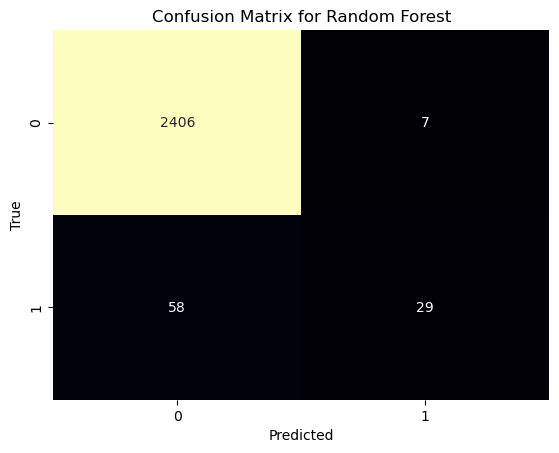

In [46]:
#plotting confusion matrix

cm = confusion_matrix(y_test, yPredRFGridTest)

# Create a heatmap using seaborn
sns.heatmap(cm, annot=True, cmap='magma', fmt='d', cbar=False)

# Add labels, title, and axis ticks
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix for Random Forest')
plt.show()

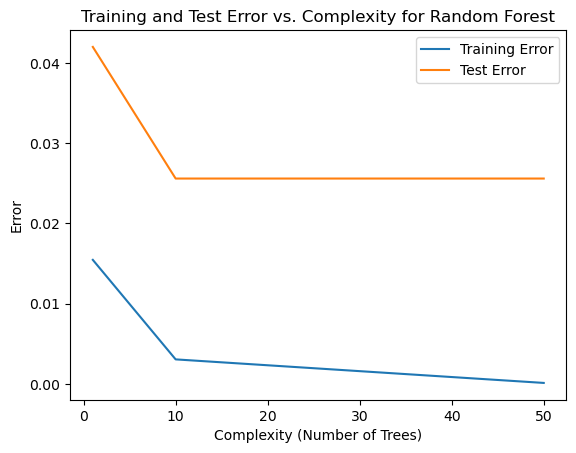

In [47]:
#plot graph of training and test error as a function of complexity(number of trees) 

# Define the complexity levels (number of trees) in logspace
ComplexityLevelRF = [1,10, 50]

# Initialize lists to store train and test errors
RFtrainErrors = []
RFtestErrors = []

# Iterate over the complexity levels
for level in ComplexityLevelRF:
    # Create a Random Forest classifier with the specified number of trees
    randomForest = ensemble.RandomForestClassifier(n_estimators=level, random_state=42)
    
    # Fit the model to the training data
    randomForest.fit(X_train, y_train)
    
    # Predict the labels for the training data
    RFTrainPredict = randomForest.predict(X_train)
    
    # Calculate the training error
    TrainErrorRF = 1 - accuracy_score(y_train, RFTrainPredict)
    RFtrainErrors.append(TrainErrorRF)
    
    # Predict the labels for the test data
    RFTestPredict = randomForest.predict(X_test)
    
    # Calculate the test error
    TestErrorRF = 1 - accuracy_score(y_test, RFTestPredict)
    RFtestErrors.append(TestErrorRF)
    
# Plot the training and test errors
plt.plot(ComplexityLevelRF, RFtrainErrors, label='Training Error')
plt.plot(ComplexityLevelRF, RFtestErrors, label='Test Error')
plt.xlabel('Complexity (Number of Trees)')
plt.ylabel('Error')
plt.title('Training and Test Error vs. Complexity for Random Forest')
plt.legend()
plt.show()


In [48]:
#Performing cross validation using DT classifier
#Define the DT model
decisionTree = tree.DecisionTreeClassifier(max_depth = 5,random_state=42)

#7500 training set divided into 5 folds and one of the folds held out as test set. therefore, 
#validation set will have a shape of (1500,8)
yPredDT = [None]*(1500)

# Perform stratified k-fold cross-validation
cv_scores = []

kFoldStratified = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
for train_index, val_index in kFoldStratified.split(X_train, y_train):
    XtrainFold, XvalFold = X_train.iloc[train_index], X_train.iloc[val_index]
    ytrainFold, yvalFold = y_train.iloc[train_index], y_train.iloc[val_index]
        
    #fitting the data to the decison tree classifier
    decisionTree.fit(XtrainFold,ytrainFold)
    yPredDT = decisionTree.predict(XvalFold)
    precision, recall, Scores, support = precision_recall_fscore_support(yvalFold,yPredDT, average = 'weighted')
    cv_scores.append(Scores)

print("XtrainFold", XtrainFold.shape)
print("Cross-Validation Scores(f1):", cv_scores)
print("Mean cross validation Score:", np.mean(cv_scores))

XtrainFold (6000, 6)
Cross-Validation Scores(f1): [0.9738557264957265, 0.9582901244956938, 0.9707978142076502, 0.9702265133468433, 0.9666173230614156]
Mean cross validation Score: 0.9679575003214659


In [71]:
#fine tune Decision Tree using grid search
# Define the hyperparameters and their possible values
param_grid = {
    'max_depth': [1,3, 5, 7,20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Create the grid search object
grid_search = GridSearchCV(estimator=decisionTree, param_grid=param_grid, scoring='f1_weighted', cv=5)

# Fit the grid search to the training data
grid_search.fit(X_train, y_train)

# Get the best hyperparameters and the corresponding model
bestParamsDT = grid_search.best_params_
best_model = grid_search.best_estimator_
print("Best Parameters:", bestParamsDT)

Best Parameters: {'max_depth': 7, 'min_samples_leaf': 1, 'min_samples_split': 2}


In [52]:
# Evaluate the best model on the test data
y_predDTGridTest = best_model.predict(X_test)
accuracy = accuracy_score(y_test, y_predDTGridTest)
F1score = f1_score(y_test, y_predDTGridTest, average='weighted')
precision, recall, F1score, support = precision_recall_fscore_support(y_test, y_predDTGridTest, average='weighted')

print("Best Hyperparameters:", best_params)
print("Test Accuracy:", accuracy)
print("Test F1 Score:", F1score)
print("Test Precision:", precision)
print("Test Recall:", recall)

print(classification_report(y_test, y_predDTGridTest))

Best Hyperparameters: {'max_depth': 7, 'min_samples_leaf': 1, 'min_samples_split': 2}
Test Accuracy: 0.9728
Test F1 Score: 0.9677529827852357
Test Precision: 0.9683294220610759
Test Recall: 0.9728
              precision    recall  f1-score   support

           0       0.98      1.00      0.99      2413
           1       0.74      0.33      0.46        87

    accuracy                           0.97      2500
   macro avg       0.86      0.66      0.72      2500
weighted avg       0.97      0.97      0.97      2500



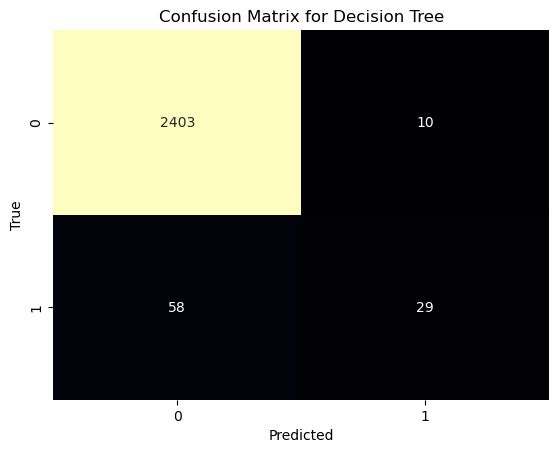

In [53]:
#plotting confusion matrix

cm = confusion_matrix(y_test, y_predDTGridTest)

# Create a heatmap using seaborn
sns.heatmap(cm, annot=True, cmap='magma', fmt='d', cbar=False)

# Add labels, title, and axis ticks
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix for Decision Tree')
plt.show()

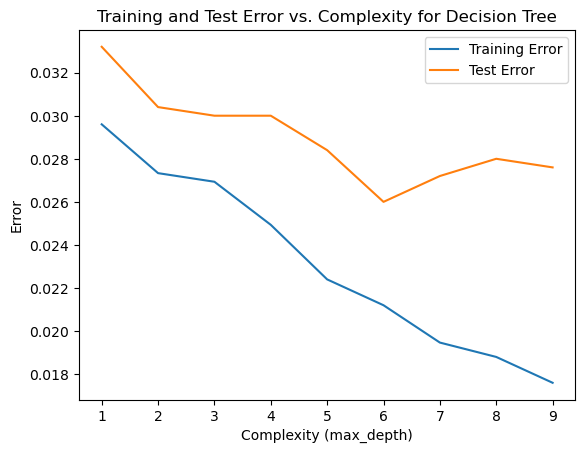

In [68]:
# Complexity levels for Decision Tree (max_depth)
ComplexityLevelDT = np.arange(1, 10)
DTtrainErrors = []
DTtestErrors = []

for level in ComplexityLevelDT:
    # Create and fit the Decision Tree model
    ComplexDTmodel = tree.DecisionTreeClassifier(max_depth=level, random_state=42)
    ComplexDTmodel.fit(X_train, y_train)
    
    # Calculate training error
    DTTrainPredict = ComplexDTmodel.predict(X_train)
    TrainErrorDT = 1 - accuracy_score(y_train, DTTrainPredict)
    DTtrainErrors.append(TrainErrorDT)
    
    # Calculate test error
    DTTestPredict = ComplexDTmodel.predict(X_test)
    TestErrorDT = 1 - accuracy_score(y_test, DTTestPredict)
    DTtestErrors.append(TestErrorDT)

# Plotting the graph
plt.plot(ComplexityLevelDT, DTtrainErrors, label='Training Error')
plt.plot(ComplexityLevelDT, DTtestErrors, label='Test Error')
plt.xlabel('Complexity (max_depth)')
plt.ylabel('Error')
plt.title('Training and Test Error vs. Complexity for Decision Tree')
plt.legend()
plt.show()

In [54]:
#Performing cross validation using KNN classifier
#Define the kNN model
knnclassifier = KNeighborsClassifier(n_neighbors=3)

#7500 training set divided into 5 folds and one of the folds held out as test set. therefore, 
#validation set will have a shape of (1500,8)
yPredkNN = [None]*(1500)

# Perform stratified k-fold cross-validation
cv_scores = []

kFoldStratified = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
for train_index, val_index in kFoldStratified.split(X_train, y_train):
    XtrainFold, XvalFold = X_train.iloc[train_index], X_train.iloc[val_index]
    ytrainFold, yvalFold = y_train.iloc[train_index], y_train.iloc[val_index]
    
    knnclassifier.fit(XtrainFold,ytrainFold)
    yPredkNN = knnclassifier.predict(XvalFold)
    precision, recall, Scores, support = precision_recall_fscore_support(yvalFold,yPredkNN, average = 'weighted')
    cv_scores.append(Scores)

print("XtrainFold", XtrainFold.shape)
print("Cross-Validation Scores(f1):", cv_scores)
print("Mean cross validation Score:", np.mean(cv_scores))

XtrainFold (6000, 6)
Cross-Validation Scores(f1): [0.9648593607305936, 0.9597894086846924, 0.9628241702933948, 0.9669761681906545, 0.9613438663058915]
Mean cross validation Score: 0.9631585948410454


In [72]:
#fine tune knn classifier model using grid search
param_grid = {'n_neighbors': [3, 5, 7, 9, 11]}

knnclassifier = KNeighborsClassifier()

gridSearchkNN = GridSearchCV(knnclassifier, param_grid, scoring='f1_weighted', cv=5)
gridSearchkNN.fit(X_train, y_train)

# Get the best parameters and best score
bestParamskNN = gridSearchkNN.best_params_
bestScorekNN = gridSearchkNN.best_score_
print("Best Parameters: ",bestParamskNN)

Best Parameters:  {'n_neighbors': 7}


In [73]:
#Test the K-Nearest Neighbor model on the test set(X_test which has 2500 datapoints)
knnclassifierBest = KNeighborsClassifier(**bestParamskNN)

knnclassifierBest.fit(X_train,y_train)
#predicting the output on the test set
yPredKNNTest = knnclassifierBest.predict(X_test)

#calculating Accuracy
TestAccuracyKNN = accuracy_score(y_test,yPredKNNTest)
print("Test Accuracy: ", TestAccuracyKNN)

#Calculating F1 score
TestF1ScoreKNN = f1_score(y_test,yPredKNNTest, average = 'weighted')
print("Test F1 Score: ",TestF1ScoreKNN)

print(classification_report(y_test, yPredKNNTest))

Test Accuracy:  0.974
Test F1 Score:  0.9671445681245712
              precision    recall  f1-score   support

           0       0.97      1.00      0.99      2413
           1       0.92      0.28      0.42        87

    accuracy                           0.97      2500
   macro avg       0.95      0.64      0.71      2500
weighted avg       0.97      0.97      0.97      2500



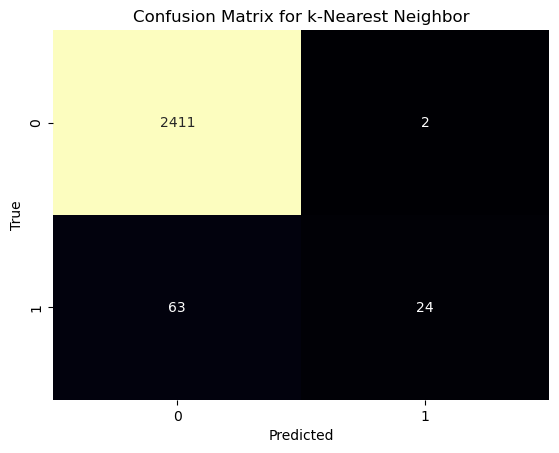

In [74]:
#plotting confusion matrix

cm = confusion_matrix(y_test, yPredKNNTest)

# Create a heatmap using seaborn
sns.heatmap(cm, annot=True, cmap='magma', fmt='d', cbar=False)

# Add labels, title, and axis ticks
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix for k-Nearest Neighbor')
plt.show()

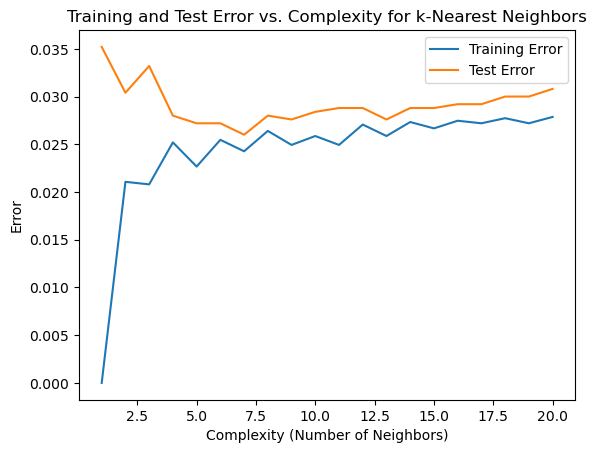

In [75]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Complexity levels for KNN (number of neighbors)
ComplexityLevelKNN = np.arange(1, 21)
KNNtrainErrors = []
KNNtestErrors = []

for level in ComplexityLevelKNN:
    # Create and fit the KNN model
    #knnclassifier = KNeighborsClassifier()
    ComplexKNNmodel = KNeighborsClassifier(n_neighbors=level)
    ComplexKNNmodel.fit(X_train, y_train)
    
    # Calculate training error
    KNNTrainPredict = ComplexKNNmodel.predict(X_train)
    TrainErrorKNN = 1 - accuracy_score(y_train, KNNTrainPredict)
    KNNtrainErrors.append(TrainErrorKNN)
    
    # Calculate test error
    KNNTestPredict = ComplexKNNmodel.predict(X_test)
    TestErrorKNN = 1 - accuracy_score(y_test, KNNTestPredict)
    KNNtestErrors.append(TestErrorKNN)

# Plotting the graph
plt.plot(ComplexityLevelKNN, KNNtrainErrors, label='Training Error')
plt.plot(ComplexityLevelKNN, KNNtestErrors, label='Test Error')
plt.xlabel('Complexity (Number of Neighbors)')
plt.ylabel('Error')
plt.title('Training and Test Error vs. Complexity for k-Nearest Neighbors')
plt.legend()
plt.show()